In [1]:
from galileojp.k3s import K3SGateway
from dotenv import load_dotenv
import warnings
from influxdb_client.client.warnings import MissingPivotFunction

warnings.simplefilter("ignore", MissingPivotFunction)

load_dotenv()

True

In [2]:
%env

{'PATH': '/home/silv/projects/silv-io/mulambda-experiments/.venv/bin:/home/silv/.pyenv/shims:/home/silv/.pyenv/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/lib/jvm/default/bin:/usr/bin/site_perl:/usr/bin/vendor_perl:/usr/bin/core_perl:/usr/lib/rustup/bin:/home/silv/.local/share/JetBrains/Toolbox/scripts',
 'INVOCATION_ID': '7489db671d8c4908be63eaae54048d2f',
 'XAUTHORITY': '/run/user/1000/.mutter-Xwaylandauth.ZJV0B2',
 'MEMORY_PRESSURE_WRITE': 'c29tZSAyMDAwMDAgMjAwMDAwMAA=',
 'GDMSESSION': 'gnome',
 'XDG_DATA_DIRS': '/home/silv/.local/share/flatpak/exports/share:/var/lib/flatpak/exports/share:/usr/local/share/:/usr/share/',
 'MEMORY_PRESSURE_WATCH': '/sys/fs/cgroup/user.slice/user-1000.slice/user@1000.service/session.slice/org.gnome.Shell@wayland.service/memory.pressure',
 'MOTD_SHOWN': 'pam',
 'DBUS_SESSION_BUS_ADDRESS': 'unix:path=/run/user/1000/bus',
 'LANG': 'en_US.UTF-8',
 'XDG_SESSION_TYPE': 'wayland',
 'XDG_ACTIVATION_TOKEN': '<hidden>',
 'PS1': '(.venv) ',
 'XDG_CURRENT_DES

In [3]:
gw = K3SGateway.from_env()

In [4]:
gw.experiments().sort_values(by='CREATED', ascending=False).head(10)

/home/silv/projects/silv-io/mulambda-experiments/.venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/home/silv/projects/silv-io/mulambda-experiments/.venv/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,EXP_ID,NAME,CREATOR,START,END,CREATED,STATUS,metadata
70,202309280840-4bfd,exp-test-mulambda-client-scp-10-10-5,silvio,1.695883e+09,1.695883e+09,1.695883e+09,FINISHED,"{""exp_id"": ""202309280840-4bfd"", ""target"": ""mul..."
69,202309280833-28cd,exp-man-bd6e0290-mulambda-client-scp-10-10-5,silvio,1.695883e+09,1.695883e+09,1.695883e+09,FINISHED,"{""exp_id"": ""202309280833-28cd"", ""target"": ""mul..."
68,202309220052-dbda,exp-logical-mult-22d9-round-robin-client-scp-1...,silvio,1.695337e+09,1.695338e+09,1.695337e+09,FINISHED,"{""exp_id"": ""202309220052-dbda"", ""target"": ""rou..."
67,202309220034-9f79,exp-logical-mult-22d9-random-client-scp-1000-10-5,silvio,1.695336e+09,1.695337e+09,1.695336e+09,FINISHED,"{""exp_id"": ""202309220034-9f79"", ""target"": ""ran..."
66,202309220013-ee99,exp-logical-mult-22d9-plain-net-latency-client...,silvio,1.695334e+09,1.695336e+09,1.695334e+09,FINISHED,"{""exp_id"": ""202309220013-ee99"", ""target"": ""pla..."
65,202309220006-9452,exp-logical-mult-22d9-mulambda-client-scp-1000...,silvio,1.695334e+09,1.695334e+09,1.695334e+09,FINISHED,"{""exp_id"": ""202309220006-9452"", ""target"": ""mul..."
63,202309220006-50d0,exp-logical-mult-22d9-round-robin-client-psa-1...,silvio,1.695334e+09,1.695334e+09,1.695334e+09,FINISHED,"{""exp_id"": ""202309220006-50d0"", ""target"": ""rou..."
64,202309220006-6692,exp-logical-mult-22d9-random-client-psa-10-10-5,silvio,1.695334e+09,1.695334e+09,1.695334e+09,FINISHED,"{""exp_id"": ""202309220006-6692"", ""target"": ""ran..."
61,202309220005-d3ad,exp-logical-mult-22d9-plain-net-latency-client...,silvio,1.695334e+09,1.695334e+09,1.695334e+09,FINISHED,"{""exp_id"": ""202309220005-d3ad"", ""target"": ""pla..."
62,202309220005-f340,exp-logical-mult-22d9-mulambda-client-psa-10-10-5,silvio,1.695334e+09,1.695334e+09,1.695334e+09,FINISHED,"{""exp_id"": ""202309220005-f340"", ""target"": ""mul..."


In [13]:
exp_id = '202309220006-9452'

In [35]:
tm = gw.telemetry(exp_id)
len(tm)


94248

,value,exp_id,metric,node,ts,subsystem
ts,,,,,,
2023-09-21 22:06:39.748822451,9.705873e+10,202309220006-9452,kubernetes_cgrp_cpu,s20-controller-zone-c-0,1695333999.7488225,0af0c76479f170d15689d04ca0241bfb
2023-09-21 22:06:42.750317335,9.706802e+10,202309220006-9452,kubernetes_cgrp_cpu,s20-controller-zone-c-0,1695334002.7503173,0af0c76479f170d15689d04ca0241bfb
2023-09-21 22:06:45.744759321,9.707264e+10,202309220006-9452,kubernetes_cgrp_cpu,s20-controller-zone-c-0,1695334005.7447593,0af0c76479f170d15689d04ca0241bfb
2023-09-21 22:06:48.736260414,9.707998e+10,202309220006-9452,kubernetes_cgrp_cpu,s20-controller-zone-c-0,1695334008.7362604,0af0c76479f170d15689d04ca0241bfb
2023-09-21 22:06:51.737968445,9.708778e+10,202309220006-9452,kubernetes_cgrp_cpu,s20-controller-zone-c-0,1695334011.7379684,0af0c76479f170d15689d04ca0241bfb
...,...,...,...,...,...,...
2023-09-21 18:52:11.525616883,3.946282e+11,202309220006-9452,kubernetes_cgrp_cpu,s30-worker-zone-c-3,1695322331.525617,f0f76360a719d5b0ab8fe0ffbe8f4223
2023-09-21 18:52:14.526512384,3.947439e+11,202309220006-9452,kubernetes_cgrp_cpu,s30-worker-zone-c-3,1695322334.5265124,f0f76360a719d5b0ab8fe0ffbe8f4223
2023-09-21 18:52:17.529692173,3.948731e+11,202309220006-9452,kubernetes_cgrp_cpu,s30-worker-zone-c-3,1695322337.5296922,f0f76360a719d5b0ab8fe0ffbe8f4223


In [115]:
ev = gw.events(exp_id)
ev.head(10)

,value,exp_id,name,ts
ts,,,,
2023-09-21 22:06:38.736365318,"{""type"": ""start""}",202309220006-9452,mulambda,1695333998.7363653
2023-09-21 22:06:38.887778997,"{""type"": ""end""}",202309220006-9452,mulambda,1695333998.887779
2023-09-21 22:06:39.076338530,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202309220006-9452,mulambda,1695333999.0763385
2023-09-21 22:06:39.195279121,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202309220006-9452,mulambda,1695333999.1952791
2023-09-21 22:06:39.312139511,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202309220006-9452,mulambda,1695333999.3121395
2023-09-21 22:06:39.318506241,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202309220006-9452,mulambda,1695333999.3185062
2023-09-21 22:06:39.405144215,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202309220006-9452,mulambda,1695333999.4051442
2023-09-21 22:06:39.437855721,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202309220006-9452,mulambda,1695333999.4378557
2023-09-21 22:06:39.574774742,"{""type"": ""request"", ""client_id"": ""mulambda-cli...",202309220006-9452,mulambda,1695333999.5747747


In [116]:
import json
from util import json_transform
import pandas as pd

new = ev.copy()
new['value'] = new['value'].apply(json.loads)
transformed = json_transform(new, "value")
transformed = json_transform(transformed, "model_traits", "model_")
transformed["time"] = (transformed.index - transformed.index[0]).total_seconds()
transformed

,exp_id,name,ts,type,client_id,data,endpoint,elapsed,model,latency,...,model_id,model_type,model_input,model_output,model_mdd,model_latencies,model_accuracy,model_path,model_port,time
ts,,,,,,,,,,,,,,,,,,,,,
2023-09-21 22:06:38.736365318,202309220006-9452,mulambda,1695333998.7363653,start,None,None,None,NaN,None,NaN,...,None,None,None,None,NaN,None,NaN,None,NaN,0.000000
2023-09-21 22:06:38.887778997,202309220006-9452,mulambda,1695333998.887779,end,None,None,None,NaN,None,NaN,...,None,None,None,None,NaN,None,NaN,None,NaN,0.151414
2023-09-21 22:06:39.076338530,202309220006-9452,mulambda,1695333999.0763385,request,mulambda-client,"{'inputs': [90.38, 66.28, 18.12, 18.55, 57.97,...",http://logical-20230921202537-0-5e082200.mulam...,0.074,None,NaN,...,logical-20230921202537-0-5e082200,dummy,dummy,dummy,0.0,"{'plain-net-latency-client': 95, 'mulambda-cli...",0.447979,/,80.0,0.339973
2023-09-21 22:06:39.195279121,202309220006-9452,mulambda,1695333999.1952791,request,mulambda-client,"{'inputs': [63.76, 47.0, 36.56, 73.15, 25.15, ...",http://logical-20230921202537-0-5e082200.mulam...,0.173,None,NaN,...,logical-20230921202537-0-5e082200,dummy,dummy,dummy,0.0,"{'plain-net-latency-client': 95, 'mulambda-cli...",0.268788,/,80.0,0.458914
2023-09-21 22:06:39.312139511,202309220006-9452,mulambda,1695333999.3121395,request,mulambda-client,"{'inputs': [43.86, 59.16, 90.1, 43.3, 24.19, 3...",http://logical-20230921202537-0-5e082200.mulam...,0.280,None,NaN,...,logical-20230921202537-0-5e082200,dummy,dummy,dummy,0.0,"{'plain-net-latency-client': 95, 'mulambda-cli...",0.089596,/,80.0,0.575774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-21 22:13:55.635186911,202309220006-9452,mulambda_companion,1695334435.635187,companion,mulambda-client,None,None,NaN,logical-20230921202537-1-78a6776b,89.0,...,None,None,None,None,NaN,None,NaN,None,NaN,436.898822
2023-09-21 22:13:56.374436617,202309220006-9452,mulambda_companion,1695334436.3744366,companion,random-client,None,None,NaN,logical-20230921202537-5-5b030830,214.0,...,None,None,None,None,NaN,None,NaN,None,NaN,437.638071
2023-09-21 22:13:56.386411667,202309220006-9452,mulambda_companion,1695334436.3864117,companion,random-client,None,None,NaN,logical-20230921202537-4-30e3bb16,215.0,...,None,None,None,None,NaN,None,NaN,None,NaN,437.650046


<AxesSubplot:xlabel='time', ylabel='elapsed'>

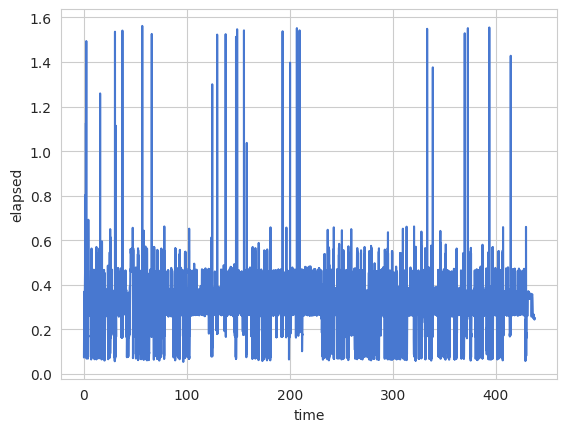

In [117]:
import seaborn as sns
sns.set_palette("muted")

sns.lineplot(data=transformed, x="time", y="elapsed")

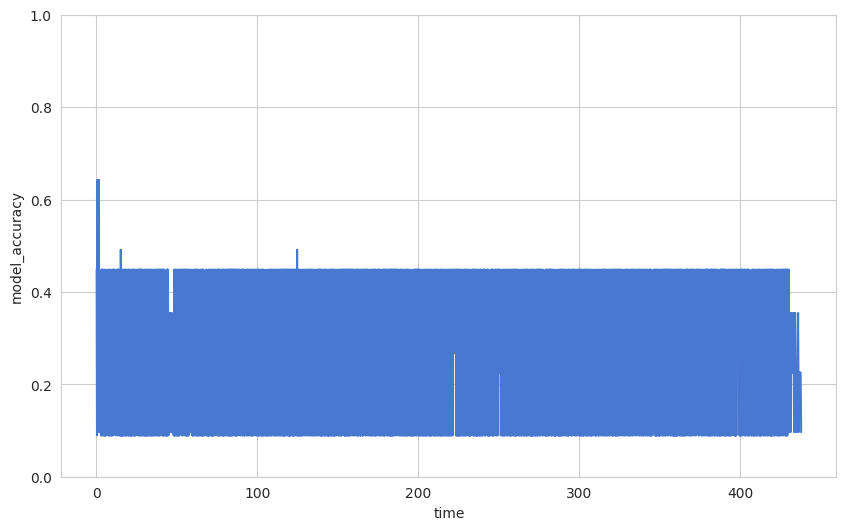

In [118]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=transformed, x="time", y="model_accuracy", ax=ax)
ax.set_ylim(0, 1)
plt.show()

<AxesSubplot:xlabel='elapsed', ylabel='Proportion'>

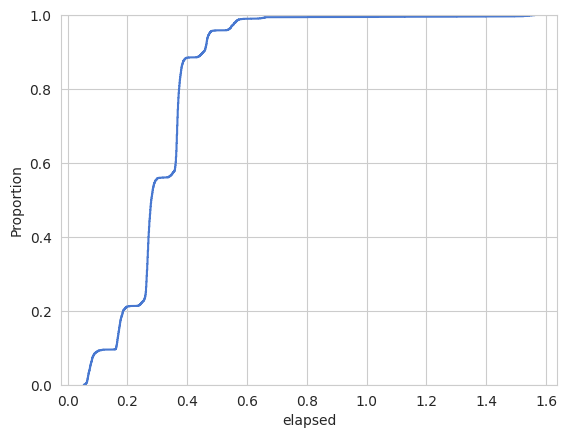

In [119]:
sns.ecdfplot(data=transformed, x="elapsed")

<AxesSubplot:xlabel='model_accuracy', ylabel='Proportion'>

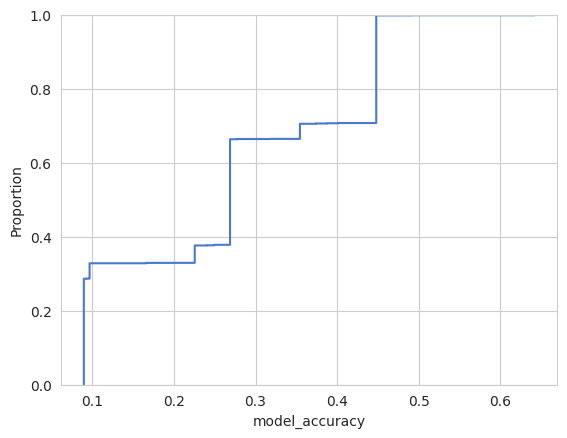

In [120]:
sns.ecdfplot(data=transformed, x="model_accuracy")


/tmp/ipykernel_79133/3875191565.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpu["time"] = (cpu.index - min(cpu.index)).total_seconds()


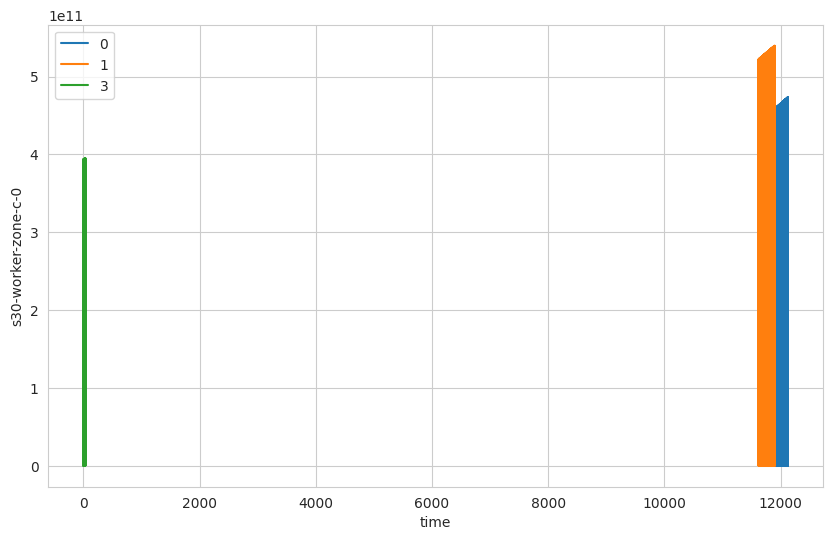

In [59]:
# tm = tm[tm["metric"] == "kubernetes_cgrp_cpu"]
# tm = tm[tm["node"] == "s30-worker-zone-c-0"]
# 
# tm.value.unique()

import matplotlib.pyplot as plt
import seaborn as sns

cpu = tm[tm["metric"] == "kubernetes_cgrp_cpu"]
cpu["time"] = (cpu.index - min(cpu.index)).total_seconds()
cpu = cpu.drop_duplicates(subset=["time"])


pv = cpu.pivot(index="time", columns="node", values="value")

pv.reset_index(inplace=True)
plt.figure(figsize=(10, 6))
sns.lineplot(data=pv, x="time", y="s30-worker-zone-c-0", label="0")
sns.lineplot(data=pv, x="time", y="s30-worker-zone-c-1", label="1")
# sns.lineplot(data=pv, x="time", y="s30-worker-zone-c-2", label="2")
sns.lineplot(data=pv, x="time", y="s30-worker-zone-c-3", label="3")
plt.legend()
plt.show()
